In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="ticks", palette="pastel")
plt.rcParams['figure.dpi'] = 96
sns.set_context("paper")

In [2]:
df_french = pd.read_excel("42256_2020_252_MOESM2_ESM.xlsx")

df_chinese = pd.read_excel("time_series_375_prerpocess_en.xlsx", index_col=[0, 1])
df_chinese = df_chinese.groupby('PATIENT_ID').last()

In [3]:
df_french.head()

,id,HR_min,HR_max,SBP_min,SBP_max,DBP_min,DBP_max,SAPSII,RR,GCS,...,ldh_j1,ldh_j2,ldh_j3,ldh_j4,ldh_j5,L_pourc_J1,L_pourc_J2,L_pourc_J3,L_pourc_J4,L_pourc_J5
0,49,61,94,93,190,66,132,27,28,15,...,.,465.00,457.00,412.00,362.0,25.0000,.,.,.,.
1,52,85,105,90,107,56,73,31,28,15,...,652.0,900.00,.,.,.,.,13.3333,.,.,.
2,55,81,170,101,154,48,66,54,20,15,...,498.0,505.00,.,.,596.0,.,.,.,.,.
3,56,79,124,105,132,40,65,27,.,15,...,568.0,.,.,.,.,4.1667,.,.,.,.
4,58,77,90,110,166,54,80,47,.,15,...,455.0,450.00,535.00,.,497.0,10.0000,.,.,4.1176,.


In [4]:
ldh_tab = df_french.loc[:, ["ldh_j1", "ldh_j2", "ldh_j3", "ldh_j4", "ldh_j5"]].replace({".": np.nan})
crp_tab = df_french.loc[:, ["crp_J1", "crp_J2", "crp_J3", "crp_J4", "crp_J5"]].replace({".": np.nan})

df_french["ldh_median"] = ldh_tab.median(axis=1)
df_french["crp_median"] = crp_tab.median(axis=1)

In [5]:
df_french.shape

(178, 45)

In [6]:
df_chinese.head()

,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,131.0,100.0,12.4,0.09,...,32.3,38.9,2.6,0.09,142.7,0.16,41.0,30.0,74.7,88.0
2,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,1.9,149.0,98.1,12.3,0.09,...,32.2,36.0,27.4,NaN,137.4,0.27,40.0,22.0,94.6,74.0
3,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,NaN,126.0,102.2,13.6,0.06,...,33.3,34.8,3.6,0.10,143.2,0.23,29.0,67.0,84.6,64.0
4,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,4.8,103.0,103.1,16.3,0.38,...,39.2,NaN,14.5,0.11,144.2,0.27,72.0,26.0,74.2,88.0
5,29,2,2020-02-01 20:59:54,2020-02-18 10:33:06,0,5.6,130.0,102.2,14.6,0.02,...,30.0,NaN,0.8,0.08,143.6,0.36,11.0,18.0,122.8,54.0


In [7]:
df_chinese.shape

(375, 79)

### Age distribution

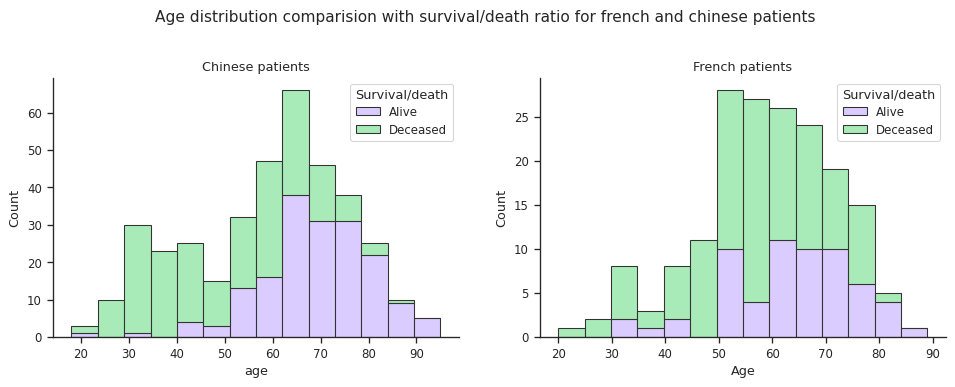

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Age distribution comparision with survival/death ratio for french and chinese patients")

sns.histplot(df_chinese, x="age", hue="outcome",
        multiple="stack",
        bins=14,
        edgecolor=".2",
        ax=ax[0],
        palette=["g", "m"])
ax[0].set_title("Chinese patients")
ax[0].legend(title='Survival/death', labels=['Alive', 'Deceased'])


sns.histplot(df_french, x="Age", hue="Death_D28",
        multiple="stack",
        edgecolor=".2",
        bins=14,
        ax=ax[1],
        palette=["g", "m"])
ax[1].set_title("French patients")
ax[1].legend(title='Survival/death', labels=['Alive', 'Deceased'])

sns.despine()
plt.subplots_adjust(wspace=0.2, top=0.8)
fig.savefig('age_dist.png', dpi=fig.dpi)
plt.show()

In [50]:
df_french["Death_D28"].value_counts()

0    117
1     61
Name: Death_D28, dtype: int64

In [51]:
df_chinese["outcome"].value_counts()

0    201
1    174
Name: outcome, dtype: int64

### Lactate dehydrogenase

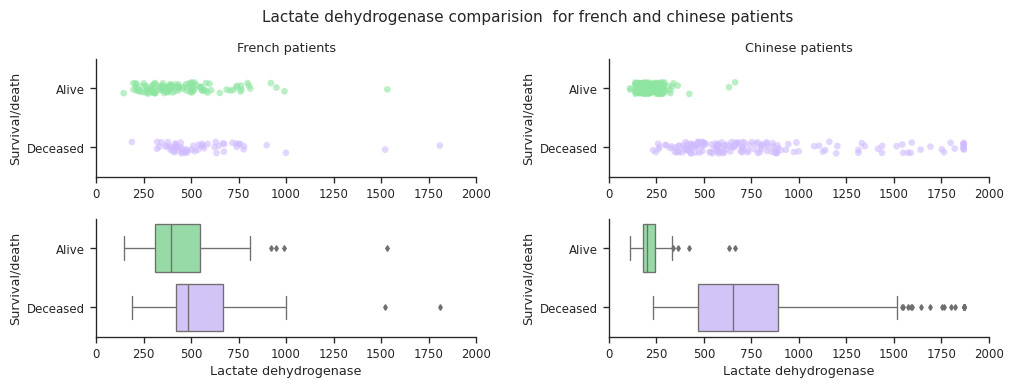

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
fig.suptitle("Lactate dehydrogenase comparision  for french and chinese patients")

sns.stripplot(x="ldh_median", y=df_french["Death_D28"].astype(str),
              data=df_french, dodge=True, alpha=.6, zorder=1, palette=["g", "m"], ax=ax[0][0])
ax[0][0].set_title("French patients")
ax[0][0].set(xlim=(0, 2000))
ax[0][0].set(xlabel="")
ax[0][0].set(ylabel="Survival/death")
ax[0][0].set_yticklabels(["Alive", "Deceased"])

sns.stripplot(x="Lactate dehydrogenase", y=df_chinese["outcome"].astype(str),
              data=df_chinese, dodge=True, alpha=.6, zorder=1, palette=["g", "m"], ax=ax[0][1])
ax[0][1].set_title("Chinese patients")
ax[0][1].set(xlim=(0, 2000))
ax[0][1].set(ylabel="Survival/death")
ax[0][1].set_yticklabels(["Alive", "Deceased"])
ax[0][1].set(xlabel="")


sns.boxplot(y=df_french["Death_D28"].astype(str), x="ldh_median", data=df_french, ax=ax[1][0], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][0].set(xlim=(0, 2000))
ax[1][0].set(xlabel="Lactate dehydrogenase")
ax[1][0].set(ylabel="Survival/death")
ax[1][0].set_yticklabels(["Alive", "Deceased"])


sns.boxplot(y=df_chinese["outcome"].astype(str), x="Lactate dehydrogenase", data=df_chinese, ax=ax[1][1], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][1].set(xlim=(0, 2000))
ax[1][1].set(ylabel="Survival/death")
ax[1][1].set_yticklabels(["Alive", "Deceased"])

plt.subplots_adjust(wspace=0.35, hspace=0.35, top=0.85)
sns.despine()
fig.savefig('ldh_french.png', dpi=fig.dpi)

plt.show()

### Other features
#### C-reactive protein

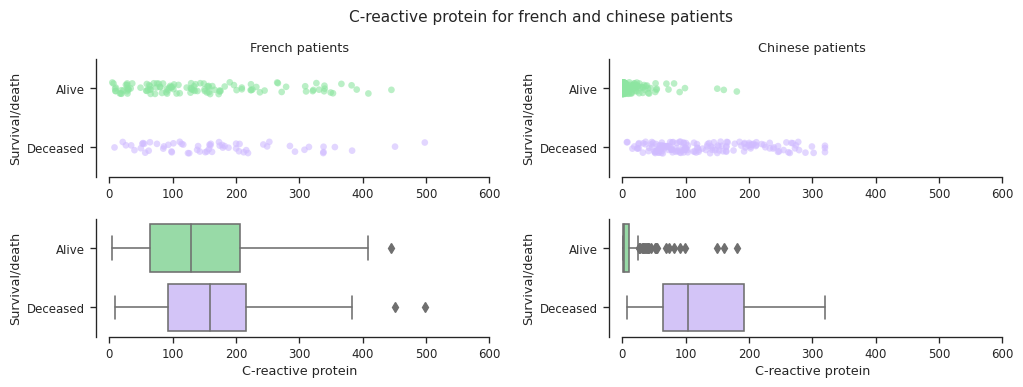

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
fig.suptitle("C-reactive protein for french and chinese patients")

sns.stripplot(x="crp_median", y=df_french["Death_D28"].astype(str),
              data=df_french, dodge=True, alpha=.6, zorder=1, palette=["g", "m"], ax=ax[0][0])
ax[0][0].set_title("French patients")
ax[0][0].set(xlim=(0, 600))
ax[0][0].set(xlabel="")
ax[0][0].set(ylabel="Survival/death")
ax[0][0].set_yticklabels(["Alive", "Deceased"])

sns.stripplot(x="High sensitivity C-reactive protein", y=df_chinese["outcome"].astype(str),
              data=df_chinese, dodge=True, alpha=.6, zorder=1, palette=["g", "m"], ax=ax[0][1])
ax[0][1].set_title("Chinese patients")
ax[0][1].set(xlim=(0, 600))
ax[0][1].set(ylabel="Survival/death")
ax[0][1].set_yticklabels(["Alive", "Deceased"])
ax[0][1].set(xlabel="")

sns.boxplot(y=df_french["Death_D28"].astype(str), x="crp_median", data=df_french, ax=ax[1][0], palette=["g", "m"])
ax[1][0].set(xlim=(0, 600))
ax[1][0].set(xlabel="C-reactive protein")
ax[1][0].set(ylabel="Survival/death")
ax[1][0].set_yticklabels(["Alive", "Deceased"])


sns.boxplot(y=df_chinese["outcome"].astype(str), x="High sensitivity C-reactive protein", data=df_chinese, ax=ax[1][1], palette=["g", "m"])
ax[1][1].set(xlim=(0, 600))
ax[1][1].set(ylabel="Survival/death")
ax[1][1].set_yticklabels(["Alive", "Deceased"])
ax[1][1].set(xlabel="C-reactive protein")

plt.subplots_adjust(wspace=0.35, hspace=0.35, top=0.85)
sns.despine(offset={'left': 10})
fig.savefig('crp_french.png', dpi=fig.dpi)

plt.show()